In [103]:
# Data Science
import numpy as np
import pandas as pd

# Visual
import matplotlib.pyplot as plt
import seaborn as sns

# plotly standard imports
from chart_studio import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px
# import plotly.io as pio

# Cufflinks wrapper on plotly
import cufflinks as cf

In [104]:
cf.go_offline()
# Setup Global Theme
cf.set_config_file(world_readable=True, theme='space', offline=True)

# Input Cells

In [105]:
demography = pd.read_excel('data/all.xlsx')#, sheet_name='Metriki')

In [106]:
demography.drop_duplicates('ID', inplace=True)

In [107]:
demography = demography.drop('ID', axis=1)

In [108]:
cz = demography[demography['Favourite category'] == 'Czech cuisine']
asian = demography[demography['Favourite category'] == 'Asian cuisine']
it = demography[demography['Favourite category'] == 'Italian cuisine']

# Weekly income + Quality + Favourite category

In [109]:
demography.groupby('Favourite category').agg({
    "Weekly income": ['mean', 'median'],
    "Preferred quality": ['mean', 'median'],
    "Name": 'size'}).style.background_gradient()

In [110]:
df2 = demography.pivot(columns="Favourite category", values="Weekly income")
df2.iplot(
    kind="box",
    yTitle="Weekly Income",
    title="Box Plot of Income and Cuisines",
)

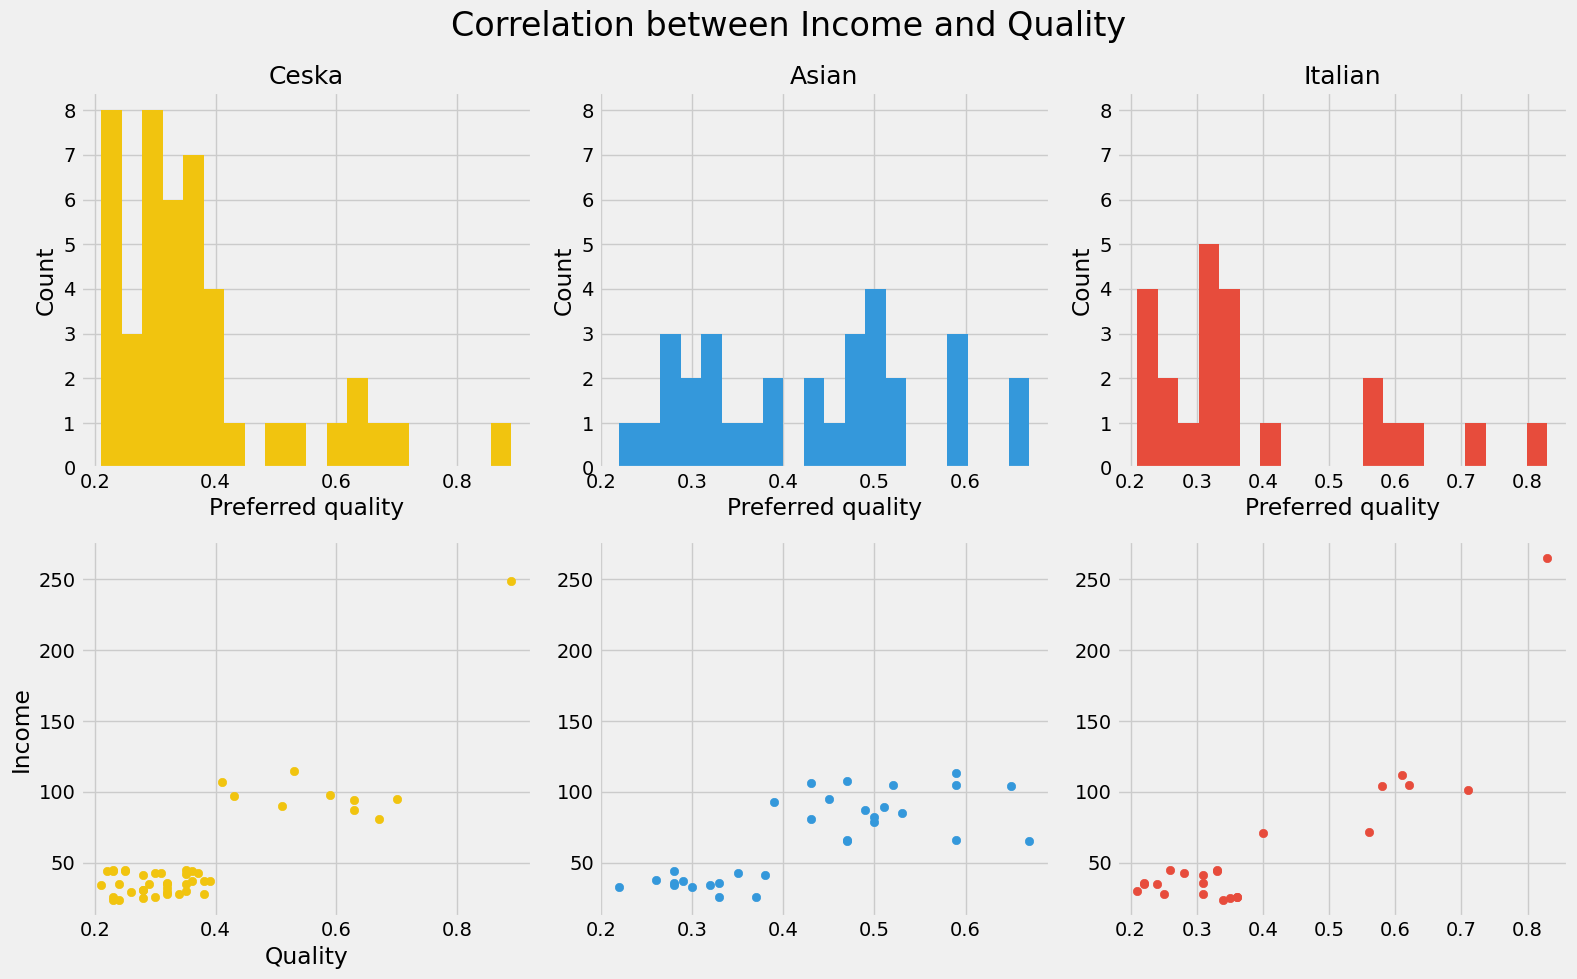

In [111]:
plt.figure(figsize=(16,10), dpi=100)
plt.suptitle("Correlation between Income and Quality", fontsize=24)
plt.tight_layout()

ax1 = plt.subplot(2,3,1)
plt.title('Ceska', fontsize=18)
plt.hist(cz['Preferred quality'], label='Ceska', color='#f1c40f', bins=20)
plt.xlabel('Preferred quality')
plt.ylabel('Count')
ax = plt.subplot(2,3,4)
plt.scatter(cz['Preferred quality'], cz['Weekly income'], label='Ceska', color='#f1c40f')
plt.xlabel('Quality')
plt.ylabel('Income')
# plt.ylim(0, 400)

plt.subplot(2,3,2, sharey=ax1)
plt.hist(asian['Preferred quality'], label='Asian', color='#3498db', bins=20)
plt.title('Asian', fontsize=18)
plt.xlabel('Preferred quality')
plt.ylabel('Count')
plt.subplot(2,3,5, sharey=ax)
plt.scatter(asian['Preferred quality'], asian['Weekly income'], label='Asian', color='#3498db')

plt.subplot(2,3,3, sharey=ax1)
plt.hist(it['Preferred quality'], label='Italian', color='#e74c3c', bins=20)
plt.title('Italian', fontsize=18)
plt.xlabel('Preferred quality')
plt.ylabel('Count')
plt.subplot(2,3,6, sharey=ax)
plt.scatter(it['Preferred quality'], it['Weekly income'], label='Italian', color='#e74c3c')
plt.tight_layout();

# Stratification by Income

In [112]:
def income_stratification(x):
    if x <= 50:
        return 'low'
    elif 50 < x <= 150:
        return 'medium'
    return 'high'

In [113]:
demography['Stratification by income'] = np.vectorize(income_stratification)(demography['Weekly income'])
cz = demography[demography['Favourite category'] == 'Czech cuisine']
asian = demography[demography['Favourite category'] == 'Asian cuisine']
it = demography[demography['Favourite category'] == 'Italian cuisine']

## Visual Count by Income

In [114]:
stratification_graph = demography.groupby(by=['Favourite category', 'Stratification by income']).size().unstack()
stratification_graph.iplot(kind='bar', linecolor="black", title="Count by Income Category")

# Ad Type

In [115]:
gbo = demography.groupby(by=['Favourite category', 'Favourite ad type']).size().unstack()
gbo.iplot(kind='bar', linecolor="black", title="Count by Ad type category")

# Более точная выборка дней по кухне и рекламе [cz, asian, it]

# New Method

In [116]:
medium_ads = demography[demography['Stratification by income'] == 'medium']
medium_ads = medium_ads.groupby(by=['Favourite category', 'Favourite ad type']).size().unstack()
medium_ads.iplot(kind='bar', linecolor="black", title="AD TYPE, Income Category=MEDIUM")

In [117]:
medium_asian = asian[asian['Stratification by income'] == 'medium']
medium_asian.drop(columns=['Name', 'Gender', 'Favourite category',
                           'Stratification by income'], inplace=True)

In [118]:
# medium_asian = medium_asian[medium_asian['Favourite ad type'] == 'promo stand big']

In [119]:
medium_asian = medium_asian.describe(include='object').drop(['count', 'unique'])

In [120]:
medium_asian.transpose()

,top,freq
Favourite ad type,promo stand big,8
MON 0-8h,Office district,18
MON 8-16h,Office district,12
MON 16-24h,Park,9
TUE 0-8h,Office district,16
TUE 8-16h,Office district,12
TUE 16-24h,Park,9
WED 0-8h,Office district,11
WED 8-16h,Park,9
WED 16-24h,Park,11


In [121]:
demography.groupby(['Favourite category', 'Stratification by income']).median()

Unnamed: 0  Unnamed: 1  \
Favourite category Stratification by income                           
Asian cuisine      low                              NaN         NaN   
                   medium                           NaN         NaN   
Czech cuisine      high                             NaN         NaN   
                   low                              NaN         NaN   
                   medium                           NaN         NaN   
Italian cuisine    high                             NaN         NaN   
                   low                              NaN         NaN   
                   medium                           NaN         NaN   

                                             Unnamed: 2  Unnamed: 3  \
Favourite category Stratification by income                           
Asian cuisine      low                              NaN         NaN   
                   medium                           NaN         NaN   
Czech cuisine      high                             NaN         NaN   
                   low                              NaN         NaN   
                   medium                           NaN         NaN   
Italian cuisine    high                             NaN         NaN   
                   low                              NaN         NaN   
                   medium                           NaN         NaN   

                                             Unnamed: 4  Unnamed: 5  \
Favourite category Stratification by income                           
Asian cuisine      low                              NaN         NaN   
                   medium                           NaN         NaN   
Czech cuisine      high                             NaN         NaN   
                   low                              NaN         NaN   
                   medium                           NaN         NaN   
Italian cuisine    high                             NaN         NaN   
                   low                              NaN         NaN   
                   medium                           NaN         NaN   

                                             Unnamed: 6  Unnamed: 7  \
Favourite category Stratification by income                           
Asian cuisine      low                              NaN         NaN   
                   medium                           NaN         NaN   
Czech cuisine      high                             NaN         NaN   
                   low                              NaN         NaN   
                   medium                           NaN         NaN   
Italian cuisine    high                             NaN         NaN   
                   low                              NaN         NaN   
                   medium                           NaN         NaN   

                                             Unnamed: 8  Unnamed: 9  ...  \
Favourite category Stratification by income                          ...   
Asian cuisine      low                              NaN         NaN  ...   
                   medium                           NaN         NaN  ...   
Czech cuisine      high                             NaN         NaN  ...   
                   low                              NaN         NaN  ...   
                   medium                           NaN         NaN  ...   
Italian cuisine    high                             NaN         NaN  ...   
                   low                              NaN         NaN  ...   
                   medium                           NaN         NaN  ...   

                                             Unnamed: 12  Unnamed: 13  \
Favourite category Stratification by income                             
Asian cuisine      low                               NaN          NaN   
                   medium                            NaN          NaN   
Czech cuisine      high                              NaN          NaN   
                   low                               NaN          NaN   
  

# WIP